from google.colab import drive
drive.mount('/content/drive',force_remount=True)

%cd drive/My\ Drive/SIC\ -\ BigData/8.\ Project/

In [3]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is CCDD-B7EF

 Directory of C:\Users\datn4\Real-Time-News-Sentiment-Prediction\Machine Learning

19/07/2024  10:48 CH    <DIR>          .
19/07/2024  10:45 CH    <DIR>          ..
19/07/2024  10:48 CH    <DIR>          .ipynb_checkpoints
19/07/2024  10:19 CH           219.728 Bert_News_sentiment_analysis.ipynb
19/07/2024  10:44 CH    <DIR>          dataset
19/07/2024  10:44 CH            11.558 LICENSE
19/07/2024  10:44 CH             4.976 README.md
19/07/2024  10:44 CH           315.435 RndFr_News_sentiment_analysis_new.ipynb
19/07/2024  10:44 CH         2.246.104 submission3.csv
19/07/2024  10:45 CH    <DIR>          trained_model
               5 File(s)      2.797.801 bytes
               5 Dir(s)  96.417.271.808 bytes free


## Import packages

In [5]:
# %pip install -U pandas
# !pip install numpy
# !pip show accelerate
# !pip show datasets
# %pip install transformers
# %pip install -U accelerate
# %pip install -U datasets
# !pip install torch
# !pip install --upgrade pyarrow
# %pip install scikit-learn
# %pip install tensorboardX
# %pip install seaborn 
# %pip install spacy
# %pip install xgboost 
# %pip install beautifulsoup4
# %pip install lxml

In [6]:
import pandas as pd
import numpy as np
import re
import string
import glob
import sys, os
os.environ['TOKENIZERS_PARALLELISM']='false'
import torch
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer, AutoModel, AutoModelForSequenceClassification,BertForSequenceClassification
import sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from bs4 import BeautifulSoup

C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
import string
punctuations = string.punctuation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Prepare DataSet

In [10]:
#Import dataset
train = pd.read_csv('dataset/train_file.csv')
train = train.astype(str)
train['SentimentTitle'] = train['SentimentTitle'].astype(float)
train['SentimentHeadline'] = train['SentimentHeadline'].astype(float)

test = pd.read_csv('dataset/test_file.csv')
test = test.astype(str)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55932 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  object 
 7   GooglePlus         55932 non-null  object 
 8   LinkedIn           55932 non-null  object 
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), object(9)
memory usage: 4.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37288 entries, 0 to 37287
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDLink       37288 n

In [11]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


## Data visualization

**Joint Plot**

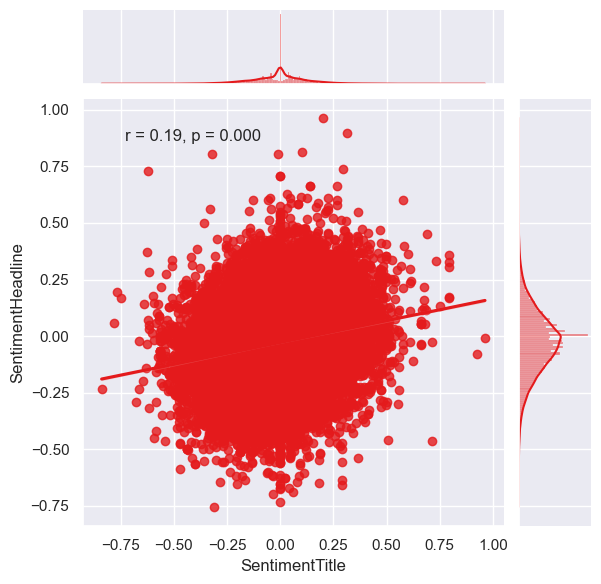

In [14]:
# Set theme
sns.set_theme(style='darkgrid', palette='Set1')

# Create the jointplot
g = sns.jointplot(x='SentimentTitle', y='SentimentHeadline', data=train, kind='reg')

# Calculate Pearson correlation
r, p = stats.pearsonr(train['SentimentTitle'], train['SentimentHeadline'])

# Annotate the plot
g.ax_joint.annotate(f'r = {r:.2f}, p = {p:.3f}', xy=(0.1, 0.9), xycoords='axes fraction')

# Show the plot
plt.show()

**Heat map**

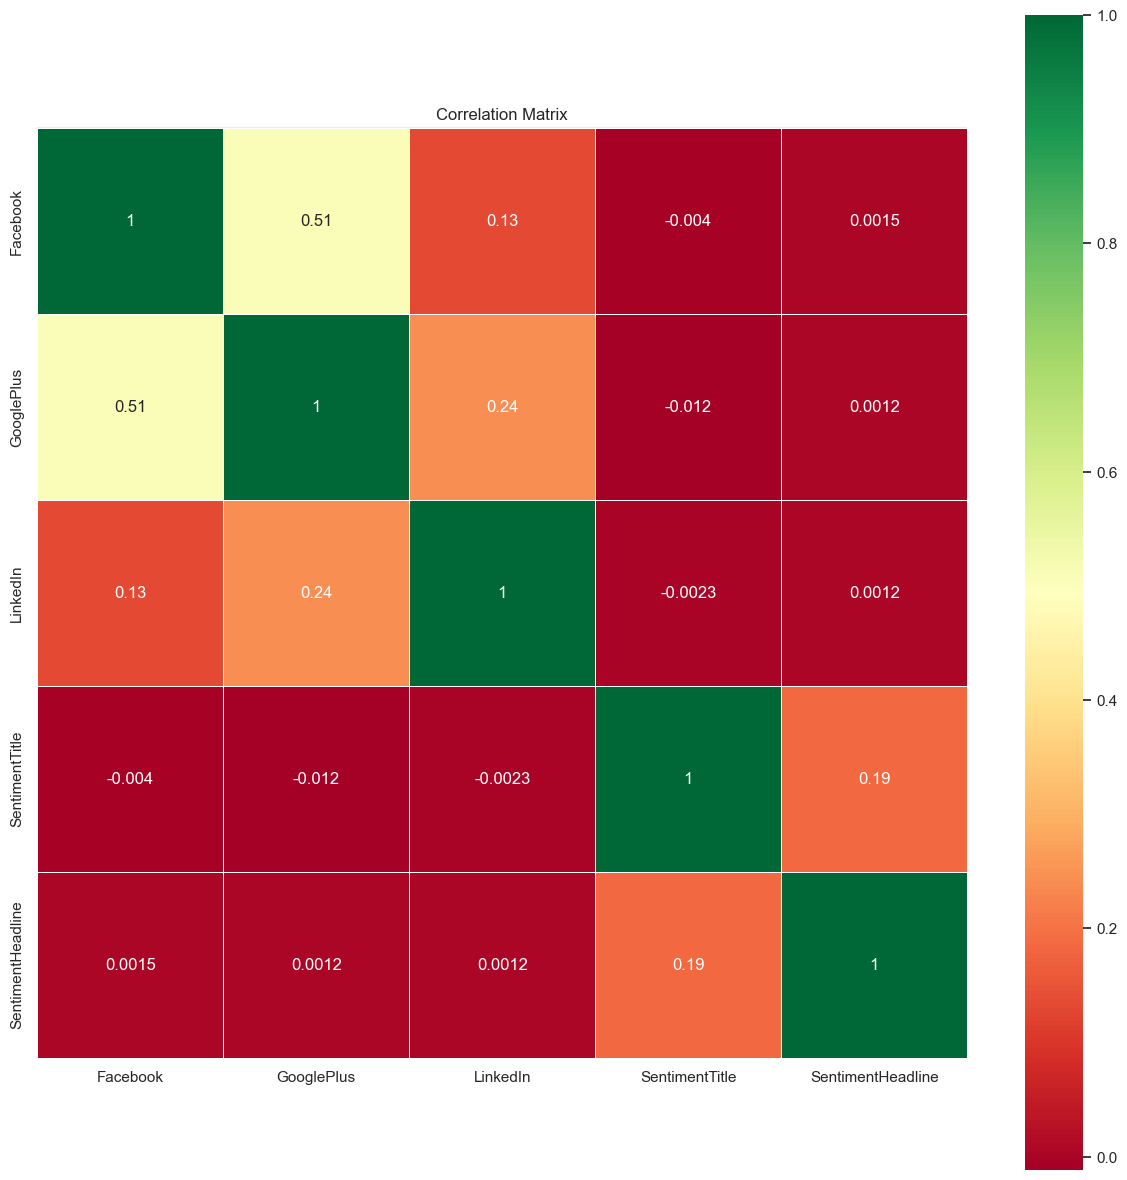

In [16]:
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
corr_matrix = train[['Facebook', 'GooglePlus', 'LinkedIn', 'SentimentTitle', 'SentimentHeadline']].corr()
sns.heatmap(corr_matrix, square=True, cmap='RdYlGn', linewidths=0.5, linecolor='w', annot=True)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


## Preprocessing DataSet

#### A: Clean 'text' columns
- python -m spacy download en_core_web_sm

**Creating our tokenizer function - lemmatized, lowercased; remove "-PRON"s, stop_words, punctuations**

In [20]:
nlp = English()
nlp = spacy.load('en_core_web_sm')
def clean_text(sentence):
    sentence = BeautifulSoup("<html>"+sentence+"</html>", "lxml").get_text()
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized (từ gốc dạng hiện tại) and lowercased
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Removing stop words using stopword from spacy library and punctuations from string library
    # stop_words này bao gồm cả các "-PRON-"
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    # return preprocessed list of tokens
    return ' '.join(mytokens).strip().lower()


In [21]:
print(clean_text('&quot;Obama Lays Wreath at Arlington National Cemetery'))

obama lays wreath arlington national cemetery


**Train_val_test_title dataset**

In [23]:
train_title = train[['Title', 'SentimentTitle']]
train_title = train_title.rename(columns={'Title': 'text', 'SentimentTitle': 'label'})
train_title_dataset = Dataset.from_pandas(train_title)
train_val_title = train_title_dataset.train_test_split(test_size=0.1)
test_title_dataset = Dataset.from_pandas(test[['Title']].rename(columns={'Title': 'text'}))

title_dataset = DatasetDict({
    'train' : train_val_title['train'],
    'eval' : train_val_title['test'],
    'test' : test_title_dataset,
})

**Train_val_test_headline dataset**

In [25]:
train_headline = train[['Headline', 'SentimentHeadline']]
train_headline = train_headline.rename(columns={'Headline': 'text', 'SentimentHeadline': 'label'})
train_headline_dataset = Dataset.from_pandas(train_headline)
train_val_headline = train_headline_dataset.train_test_split(test_size=0.1)
test_headline_dataset = Dataset.from_pandas(test[['Headline']].rename(columns={'Headline': 'text'}))

headline_dataset = DatasetDict({
    'train' : train_val_headline['train'],
    'eval' : train_val_headline['test'],
    'test' : test_headline_dataset,
})

**Clean_text**

In [27]:
def preprocess_function(examples):
    examples['text'] = [clean_text(text) for text in examples['text']]
    return examples

**Áp dụng hàm `preprocess_function` cho các phần của DatasetDict**

In [29]:
title_dataset = title_dataset.map(preprocess_function, batched=True)

Map: 100%|██████████| 37288/37288 [02:51<00:00, 217.03 examples/s]


**Áp dụng hàm `preprocess_function` cho các phần của DatasetDict**

In [31]:
headline_dataset = headline_dataset.map(preprocess_function, batched=True)

Map: 100%|██████████| 37288/37288 [03:57<00:00, 156.69 examples/s]


### B: Check datasets shape

**Titles shape**

In [34]:
print('Training title data shape:', title_dataset['train'].shape)
print('Eval title data shape:', title_dataset['eval'].shape)
print('Test title data shape:', title_dataset['test'].shape)

Training title data shape: (50338, 2)
Eval title data shape: (5594, 2)
Test title data shape: (37288, 1)


**Headlines shape**

In [36]:
print('Training headline data shape:', headline_dataset['train'].shape)
print('Eval headline data shape:', headline_dataset['eval'].shape)
print('Test headline data shape:', headline_dataset['test'].shape)

Training headline data shape: (50338, 2)
Eval headline data shape: (5594, 2)
Test headline data shape: (37288, 1)


### C: Tokenized

In [38]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
def tokenize(batch):
    return tokenizer( batch['text'],truncation=True)

**Tokenized Title**

In [40]:
encoded_title_dataset = title_dataset.map(tokenize,batched=True,batch_size=None)

print('Train_title_dataset:')
print(encoded_title_dataset['train'].features)
print(encoded_title_dataset['train'])
print('Eval_title_dataset:')
print(encoded_title_dataset['eval'].features)
print(encoded_title_dataset['eval'])
print('Train_title_dataset:')
print(encoded_title_dataset['test'].features)
print(encoded_title_dataset['test'])

Map: 100%|██████████| 37288/37288 [00:01<00:00, 23100.99 examples/s]

Train_title_dataset:
{'text': Value(dtype='string', id=None), 'label': Value(dtype='float64', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}
Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 50338
})
Eval_title_dataset:
{'text': Value(dtype='string', id=None), 'label': Value(dtype='float64', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}
Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5594
})
Train_title_dataset:
{'text': Value(dtype='string', id=N

**Tokenized Headline**

In [42]:
encoded_headline_dataset = headline_dataset.map(tokenize,batched=True,batch_size=None)

print('Train_headline_dataset:')
print(encoded_headline_dataset['train'].features)
print(encoded_headline_dataset['train'])
print('Eval_headline_dataset:')
print(encoded_headline_dataset['eval'].features)
print(encoded_headline_dataset['eval'])
print('Test_headline_dataset:')
print(encoded_headline_dataset['test'].features)
print(encoded_headline_dataset['test'])

Map: 100%|██████████| 37288/37288 [00:02<00:00, 13245.35 examples/s]

Train_headline_dataset:
{'text': Value(dtype='string', id=None), 'label': Value(dtype='float64', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}
Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 50338
})
Eval_headline_dataset:
{'text': Value(dtype='string', id=None), 'label': Value(dtype='float64', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}
Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5594
})
Test_headline_dataset:
{'text': Value(dtype='strin

## T5-base Model

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [45]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=1).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Define Trainer parameters**

In [47]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)
    mse = mean_squared_error(labels, logits)
    rmse = mean_squared_error(labels, logits, squared=False)
    mae = mean_absolute_error(labels, logits)
    return {"mse": mse, "rmse": rmse, "mae": mae}


training_args = TrainingArguments(output_dir='./results',
                                  num_train_epochs=3,
                                  auto_find_batch_size=True,
                                  weight_decay=0.01,
                                  learning_rate=2e-5,
                                  metric_for_best_model='mae',
                                  greater_is_better=False,
                                  group_by_length=True,
                                  eval_strategy='epoch')


def split_dataset(dataset, split_ratio=0.1):
    split = dataset.train_test_split(test_size=split_ratio)
    return split['test']
    

### Title Model Trainer

In [49]:
trainer_title = Trainer(
    model=model,
    args=training_args,
    # train_dataset= split_dataset(encoded_title_dataset['train'], split_ratio=0.1),
    # eval_dataset= split_dataset(encoded_title_dataset['eval'], split_ratio=0.1),
    train_dataset=encoded_title_dataset['train'],
    eval_dataset=encoded_title_dataset['eval'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)


In [50]:
trainer_title.train()

C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mae
1,0.012700,0.014586,0.014586,0.120772,0.091216
2,0.008800,0.011015,0.011015,0.104950,0.074338
3,0.006300,0.009799,0.009799,0.098990,0.068925


C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TrainOutput(global_step=18879, training_loss=0.010419881977174448, metrics={'train_runtime': 1750.0551, 'train_samples_per_second': 86.291, 'train_steps_per_second': 10.788, 'total_flos': 798327274027656.0, 'train_loss': 0.010419881977174448, 'epoch': 3.0})

In [51]:
trainer_title.evaluate()

C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'eval_loss': 0.009798926301300526,
 'eval_mse': 0.009798926301300526,
 'eval_rmse': 0.09898952394723892,
 'eval_mae': 0.06892481446266174,
 'eval_runtime': 8.0483,
 'eval_samples_per_second': 695.053,
 'eval_steps_per_second': 86.975,
 'epoch': 3.0}

In [52]:
data_tit = {
    'text': ['Sliding Economy: FG fights back with N3trn TSA funds', 
             'Ghana: Who Killing Ghana Economy'
            ],}


# Đoạn mã đúng:
df_tit = pd.DataFrame(data_tit)  # Chuyển dict thành DataFrame

dataset_sample_tit = Dataset.from_pandas(df_tit)
dataset_sample_tit = dataset_sample_tit.map(preprocess_function, batched=True)
dataset_sample_tit = dataset_sample_tit.map(tokenize, batched=True, batch_size=None)

Map: 100%|██████████| 2/2 [00:00<00:00, 125.24 examples/s]


In [53]:
trainer_title.predict(dataset_sample_tit)

PredictionOutput(predictions=array([[-0.05939968],
       [-0.00034446]], dtype=float32), label_ids=None, metrics={'test_runtime': 0.0197, 'test_samples_per_second': 101.307, 'test_steps_per_second': 50.653})

### Headline Model Trainer

In [55]:
trainer_headline = Trainer(
    model=model,
    args=training_args,
    # train_dataset= split_dataset(encoded_title_dataset['train'], split_ratio=0.1),
    # eval_dataset= split_dataset(encoded_title_dataset['eval'], split_ratio=0.1),
    train_dataset=encoded_headline_dataset['train'],
    eval_dataset=encoded_headline_dataset['eval'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)


In [56]:
trainer_headline.train()

Epoch,Training Loss,Validation Loss,Mse,Rmse,Mae
1,0.013000,0.011787,0.011787,0.108569,0.082188
2,0.008500,0.010964,0.010964,0.104709,0.078606
3,0.005400,0.011345,0.011345,0.106515,0.079323


C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TrainOutput(global_step=18879, training_loss=0.009488182670516074, metrics={'train_runtime': 1908.2104, 'train_samples_per_second': 79.139, 'train_steps_per_second': 9.894, 'total_flos': 1586112728273988.0, 'train_loss': 0.009488182670516074, 'epoch': 3.0})

In [57]:
trainer_headline.evaluate()

C:\Users\datn4\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'eval_loss': 0.0113453920930624,
 'eval_mse': 0.0113453920930624,
 'eval_rmse': 0.10651475191116333,
 'eval_mae': 0.0793234184384346,
 'eval_runtime': 12.9652,
 'eval_samples_per_second': 431.462,
 'eval_steps_per_second': 53.991,
 'epoch': 3.0}

In [58]:
data_head = {
    'text': ['With the 2016 budget now passed by the National Assembly and a N3trillion war chest, the government of President Muhammadu Buhari says'
             ,'The Ghanaian middle class has raised an eyebrow concerning the huge sums of monies that government spends on projects, which at the long'
            ],}


# Đoạn mã đúng:
df_head = pd.DataFrame(data_head)  # Chuyển dict thành DataFrame

dataset_sample_head = Dataset.from_pandas(df_head)
dataset_sample_head = dataset_sample_head.map(preprocess_function, batched=True)
dataset_sample_head = dataset_sample_head.map(tokenize, batched=True, batch_size=None)

Map: 100%|██████████| 2/2 [00:00<00:00, 66.67 examples/s]


In [59]:
trainer_headline.predict(dataset_sample_head)

PredictionOutput(predictions=array([[-0.06236442],
       [ 0.03808755]], dtype=float32), label_ids=None, metrics={'test_runtime': 0.0248, 'test_samples_per_second': 80.561, 'test_steps_per_second': 40.281})

## Save Model

In [61]:
version='not_set'

**Save title model**

In [63]:
trainer_title.save_model(output_dir='./trained_model/Bert_title_v'+str(version))

**Save headline model**

In [65]:
trainer_title.save_model(output_dir='./trained_model/Bert_headline_v'+str(version))

## Load Pretrained Model

In [137]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [67]:
model_version = 1

In [68]:
nlp = English()
nlp = spacy.load('en_core_web_sm')
def clean_text(sentence):
    sentence = BeautifulSoup("<html>"+sentence+"</html>", "lxml").get_text()
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized (từ gốc dạng hiện tại) and lowercased
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Removing stop words using stopword from spacy library and punctuations from string library
    # stop_words này bao gồm cả các "-PRON-"
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    # return preprocessed list of tokens
    return ' '.join(mytokens).strip().lower()


In [69]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
def tokenize(batch):
    return tokenizer( batch['text'],truncation=True)

In [70]:
def preprocess_function(examples):
    examples['text'] = [clean_text(text) for text in examples['text']]
    return examples

In [71]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)
    mse = mean_squared_error(labels, logits)
    rmse = mean_squared_error(labels, logits, squared=False)
    mae = mean_absolute_error(labels, logits)
    return {"mse": mse, "rmse": rmse, "mae": mae}


training_args = TrainingArguments(output_dir='./trash',
                                  auto_find_batch_size=True,
                                  weight_decay=0.01,
                                  metric_for_best_model='mae',
                                 )

**Load Title Model**

In [139]:
title_pretrained_model = BertForSequenceClassification.from_pretrained('./trained_model/Bert_title_v'+str(model_version),num_labels=1).to(device)

**Load Headline Model**

In [141]:
headline_pretrained_model = BertForSequenceClassification.from_pretrained('./trained_model/Bert_headline_v'+str(model_version),num_labels=1).to(device)

**Load trainer**

In [77]:
pred_title = Trainer(
    model=title_pretrained_model,
    args=training_args,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

pred_headline = Trainer(
    model=title_pretrained_model,
    args=training_args,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

## Predict

**Title Predic**

In [80]:
pred_tit = {
    'text': ['Sliding Economy: FG fights back with N3trn TSA funds', 
             'Ghana: Who Killing Ghana Economy'
            ],}
df_pred_tit = pd.DataFrame(pred_tit)  # Chuyển dict thành DataFrame

dataset_pred_tit = Dataset.from_pandas(df_pred_tit)
dataset_pred_tit = dataset_pred_tit.map(preprocess_function, batched=True)
dataset_pred_tit = dataset_pred_tit.map(tokenize, batched=True, batch_size=None)

Map: 100%|██████████| 2/2 [00:00<?, ? examples/s]


In [81]:
# print('Test_headline_dataset:')
# print(dataset_sample_tit.features)
# print(dataset_sample_tit)

In [82]:
pred_title.predict(dataset_pred_tit)

PredictionOutput(predictions=array([[-0.10238799],
       [-0.05268085]], dtype=float32), label_ids=None, metrics={'test_runtime': 0.0168, 'test_samples_per_second': 119.095, 'test_steps_per_second': 59.548})

**Headline Predic**

In [84]:
data_head = {
    'text': ['With the 2016 budget now passed by the National Assembly and a N3trillion war chest, the government of President Muhammadu Buhari says'
             ,'The Ghanaian middle class has raised an eyebrow concerning the huge sums of monies that government spends on projects, which at the long'
            ],}
df_head = pd.DataFrame(data_head)  # Chuyển dict thành DataFrame
dataset_sample_head = Dataset.from_pandas(df_head)
dataset_sample_head = dataset_sample_head.map(preprocess_function, batched=True)
dataset_sample_head = dataset_sample_head.map(tokenize, batched=True, batch_size=None)

Map: 100%|██████████| 2/2 [00:00<00:00, 201.32 examples/s]


In [85]:
pred_headline.predict(dataset_sample_head)

PredictionOutput(predictions=array([[-0.14502665],
       [-0.0277496 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 0.018, 'test_samples_per_second': 111.006, 'test_steps_per_second': 55.503})